# Digit Classification

### Problem Statement
- In this project, we are trying to classify handwritten digits using Neural Networks.
- We will be using PyTorch library in this notebook

### Dataset
- Source : MNIST digits classification dataset
- Train data contains 60,000 images each of shape (28, 28)
- Test data contains 10,000 images each of shape (28, 28)

### Importing required packages 

In [1]:
import torchvision
from torchvision.transforms import ToTensor
import torch 
import matplotlib.pyplot as plt 
from torch import nn 

### Downloading Data

In [2]:
train_data = torchvision.datasets.MNIST(root = 'data',
                                        train = True,
                                        transform=ToTensor(),
                                        download=True)

test_data = torchvision.datasets.MNIST(root = 'data',
                                       train = False,
                                       transform=ToTensor(),
                                       download=True)

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
print(f'Shape of X_train: {train_data.data.shape}')
print(f'Shape of X_test: {test_data.data.shape}')
print(f'Shape of y_train: {train_data.targets.shape }')
print(f'Shape of y_test: {test_data.targets.shape}')

Shape of X_train: torch.Size([60000, 28, 28])
Shape of X_test: torch.Size([10000, 28, 28])
Shape of y_train: torch.Size([60000])
Shape of y_test: torch.Size([10000])


### Creating train and test dataloader

In [4]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                           batch_size = 64,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                          batch_size = 64,
                                          shuffle = False)

### Function to train the model 

In [8]:
def train(model, optimizer, loss_function, num_epochs = 5, seed = 42):
    torch.manual_seed(seed)
    loss_values = []
    accuracy_values = []
    for epoch in range(num_epochs):
        print(f'Epoch No. {epoch}:')
        accuracy_epoch = 0
        for batch_num, (images, targets) in enumerate(train_loader):
            pred = model(images)
            loss = loss_function(pred, targets)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            accuracy_epoch += (torch.argmax(pred, dim=1) == targets).float().sum()
            # tensor([True, False, True, ...) to tensor([1., 0., 1., ....]) to tensor(3.)
            loss_value = loss.item()
            if (batch_num % 100==0):
                print(f'Batch Number: {batch_num}, Loss: {loss_value:.3f}')
                loss_values.append(loss_value)
        accuracy_epoch /= len(train_loader.dataset)
        print(f'Epoch Number: {epoch + 1}, Accuracy: {accuracy_epoch.item():.3f}')
        accuracy_values.append(accuracy_epoch.item())            
    plt.plot([i+1 for i in range(num_epochs)], accuracy_values, marker = '.', color = 'green')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy curve')
    plt.show()
    plt.plot(loss_values, marker = '.', color = 'red')
    plt.xlabel('Batches(multiples of 100)')
    plt.ylabel('Loss')
    plt.title('Loss Curve')

### Calculate Accuracy for a trained model on test data

In [29]:
def get_accuracy(model):
    with torch.no_grad():
        accuracy = 0
        for images, targets in test_loader:
            pred = model(images)
            accuracy += (torch.argmax(pred, dim=1) == targets).float().sum()
        accuracy /= len(test_loader.dataset)
    print(f'Test Accuracy: {accuracy:.4f}')

### Make Predictions 

In [10]:
def predict(model, x):
    pred = model(x)
    return torch.argmax(pred, dim=1)

### Model 1
- Deep Neural Network
- Number of Layers = 2
- Neurons in each hidden layer = 512
- Loss Function = Cross Entropy 
- Optimizer = Adam
- Number of Epochs = 5 
- learning rate = 0.0001

In [17]:
model_1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)
loss_function_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr = 0.0001)

Epoch No. 0:
Batch Number: 0, Loss: 2.291
Batch Number: 100, Loss: 0.861
Batch Number: 200, Loss: 0.310
Batch Number: 300, Loss: 0.526
Batch Number: 400, Loss: 0.487
Batch Number: 500, Loss: 0.359
Batch Number: 600, Loss: 0.366
Batch Number: 700, Loss: 0.290
Batch Number: 800, Loss: 0.125
Batch Number: 900, Loss: 0.465
Epoch Number: 1, Accuracy: 0.875
Epoch No. 1:
Batch Number: 0, Loss: 0.189
Batch Number: 100, Loss: 0.416
Batch Number: 200, Loss: 0.134
Batch Number: 300, Loss: 0.268
Batch Number: 400, Loss: 0.299
Batch Number: 500, Loss: 0.342
Batch Number: 600, Loss: 0.163
Batch Number: 700, Loss: 0.192
Batch Number: 800, Loss: 0.179
Batch Number: 900, Loss: 0.129
Epoch Number: 2, Accuracy: 0.935
Epoch No. 2:
Batch Number: 0, Loss: 0.221
Batch Number: 100, Loss: 0.078
Batch Number: 200, Loss: 0.081
Batch Number: 300, Loss: 0.110
Batch Number: 400, Loss: 0.038
Batch Number: 500, Loss: 0.191
Batch Number: 600, Loss: 0.098
Batch Number: 700, Loss: 0.059
Batch Number: 800, Loss: 0.098
Ba

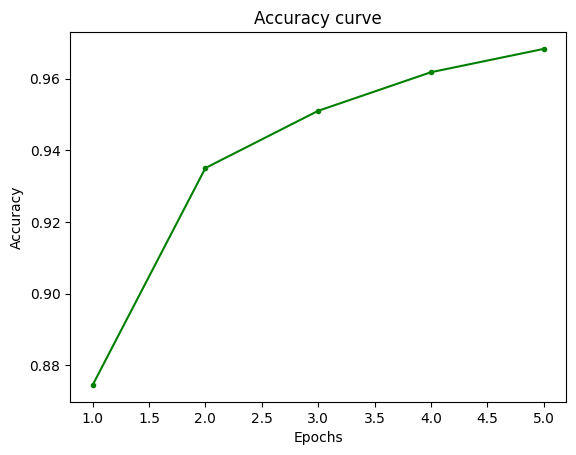

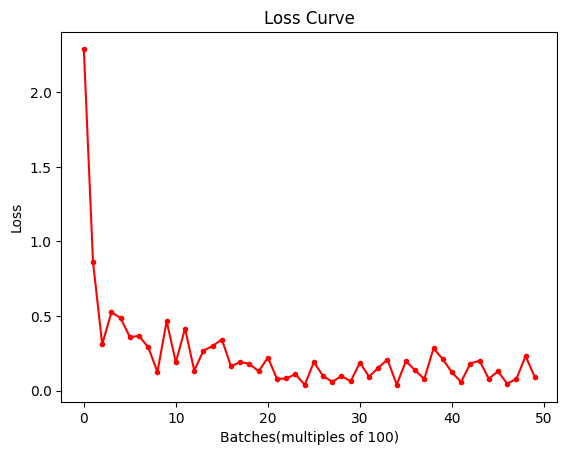

In [24]:
train(model_1, optimizer_1, loss_function_1)

In [30]:
get_accuracy(model_1)

Test Accuracy: 0.9656


- We observe that we get a test accuracy of 96.56 % for Model 1 

### Model 2
- Deep Neural Network
- Number of Layers = 3
- Neurons in each hidden layer = 512
- Loss Function = Cross Entropy 
- Optimizer = Adam
- Number of Epochs = 5 
- Learning rate = 0.01

In [26]:
model_2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)
loss_function_2 = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.Adam(model_2.parameters(), lr = 0.01)

Epoch No. 0:
Batch Number: 0, Loss: 2.303
Batch Number: 100, Loss: 0.705
Batch Number: 200, Loss: 0.166
Batch Number: 300, Loss: 0.716
Batch Number: 400, Loss: 0.568
Batch Number: 500, Loss: 0.346
Batch Number: 600, Loss: 0.249
Batch Number: 700, Loss: 0.088
Batch Number: 800, Loss: 0.196
Batch Number: 900, Loss: 0.284
Epoch Number: 1, Accuracy: 0.912
Epoch No. 1:
Batch Number: 0, Loss: 0.245
Batch Number: 100, Loss: 0.421
Batch Number: 200, Loss: 0.128
Batch Number: 300, Loss: 0.144
Batch Number: 400, Loss: 0.216
Batch Number: 500, Loss: 0.290
Batch Number: 600, Loss: 0.177
Batch Number: 700, Loss: 0.359
Batch Number: 800, Loss: 0.387
Batch Number: 900, Loss: 0.176
Epoch Number: 2, Accuracy: 0.949
Epoch No. 2:
Batch Number: 0, Loss: 0.152
Batch Number: 100, Loss: 0.131
Batch Number: 200, Loss: 0.035
Batch Number: 300, Loss: 0.117
Batch Number: 400, Loss: 0.029
Batch Number: 500, Loss: 0.104
Batch Number: 600, Loss: 0.037
Batch Number: 700, Loss: 0.061
Batch Number: 800, Loss: 0.121
Ba

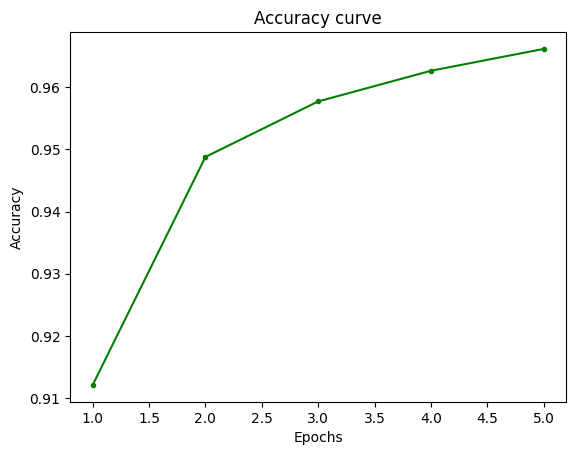

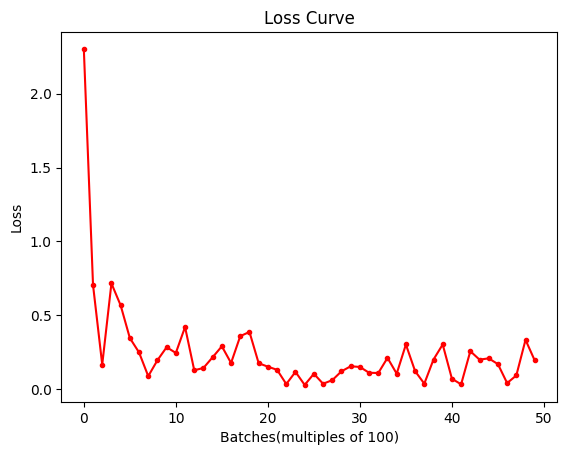

In [27]:
train(model_2, optimizer_2, loss_function_2)

In [31]:
get_accuracy(model_2)

Test Accuracy: 0.9573


- We observe that we get a test accuracy of 95.73 % for Model 2

### Model 3 
- Architecture :
  - Convolutional Layer (filter size = 5, kernel size = 3x3, stride = 1, padding = 1, Activation Function = ReLU)
  - MaxPool2D Layer (kernel size = 2x2 )
  - Flatten Layer 
  - Hidden Layer (number of neurons = 512, Activation Function = ReLU)
  - Output Layer (number of output classes = 10)
- Loss Function = Cross Entropy 
- Optimizer = Adam
- Number of Epochs = 5 
- Learning rate = 0.0001

In [32]:
class CNN_MNIST(nn.Module):
    def __init__(self, filter_size, kernel_size, hidden_size) :
        super(CNN_MNIST, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=filter_size,
                      kernel_size=kernel_size, stride = 1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(filter_size * 14 * 14, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 10)
        )
    def forward(self, x):
        x = self.conv1(x)
        x = self.fc(x)
        return x

In [35]:
model_3 = CNN_MNIST(filter_size=5, kernel_size=3, hidden_size=512)
loss_function_3 = nn.CrossEntropyLoss()
optimizer_3 = torch.optim.Adam(model_3.parameters(), lr = 0.0001)

Epoch No. 0:
Batch Number: 0, Loss: 2.325
Batch Number: 100, Loss: 1.879
Batch Number: 200, Loss: 1.137
Batch Number: 300, Loss: 0.850
Batch Number: 400, Loss: 0.633
Batch Number: 500, Loss: 0.497
Batch Number: 600, Loss: 0.419
Batch Number: 700, Loss: 0.383
Batch Number: 800, Loss: 0.137
Batch Number: 900, Loss: 0.412
Epoch Number: 1, Accuracy: 0.835
Epoch No. 1:
Batch Number: 0, Loss: 0.212
Batch Number: 100, Loss: 0.414
Batch Number: 200, Loss: 0.126
Batch Number: 300, Loss: 0.290
Batch Number: 400, Loss: 0.319
Batch Number: 500, Loss: 0.302
Batch Number: 600, Loss: 0.196
Batch Number: 700, Loss: 0.203
Batch Number: 800, Loss: 0.195
Batch Number: 900, Loss: 0.114
Epoch Number: 2, Accuracy: 0.932
Epoch No. 2:
Batch Number: 0, Loss: 0.207
Batch Number: 100, Loss: 0.105
Batch Number: 200, Loss: 0.106
Batch Number: 300, Loss: 0.122
Batch Number: 400, Loss: 0.078
Batch Number: 500, Loss: 0.201
Batch Number: 600, Loss: 0.114
Batch Number: 700, Loss: 0.070
Batch Number: 800, Loss: 0.151
Ba

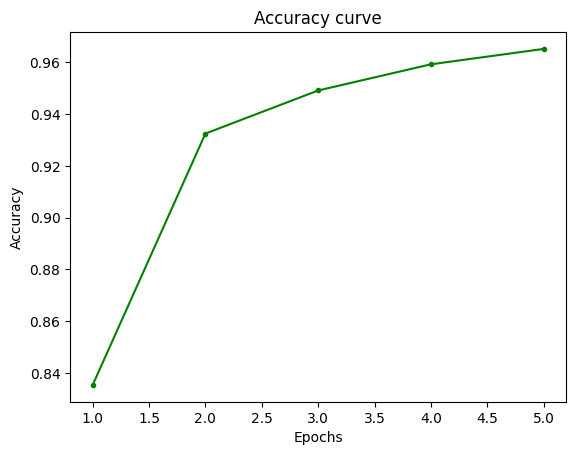

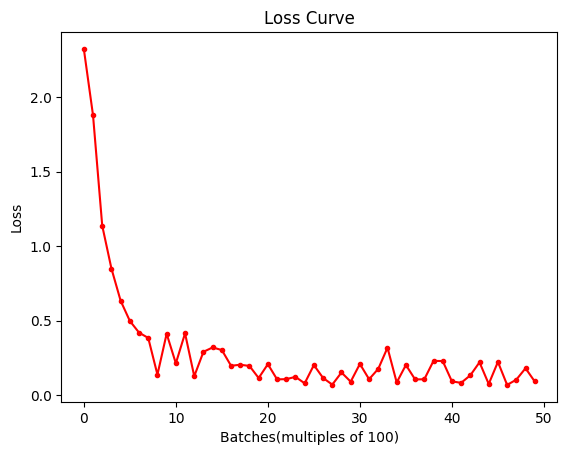

In [36]:
train(model_3, optimizer_3, loss_function_3)

In [37]:
get_accuracy(model_3)

Test Accuracy: 0.9669


- We get an accuracy of 96.69 % from Model 3

### Prediction 

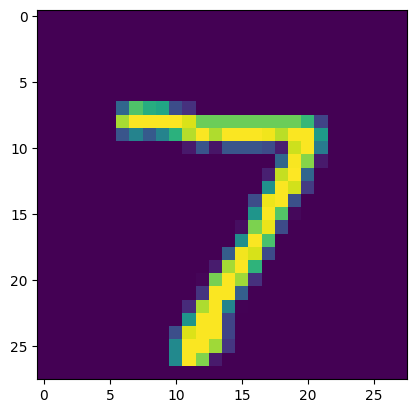

True Label = 7
Predicted Label = 7


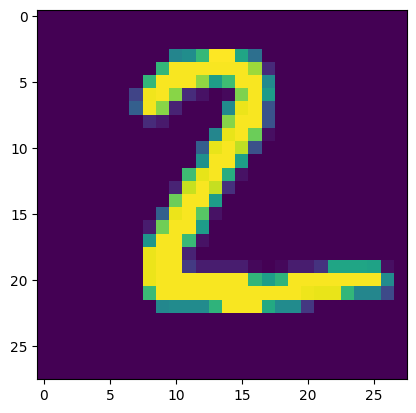

True Label = 2
Predicted Label = 2


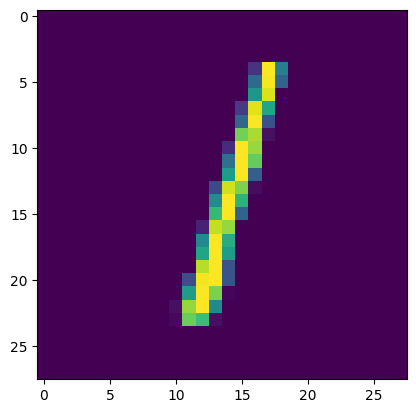

True Label = 1
Predicted Label = 1


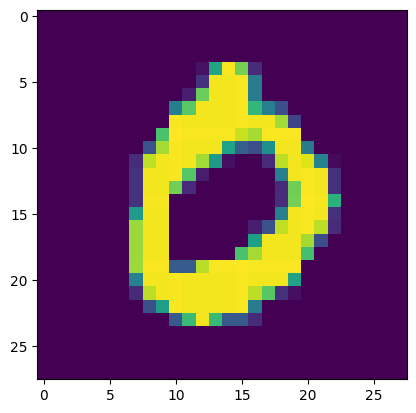

True Label = 0
Predicted Label = 0


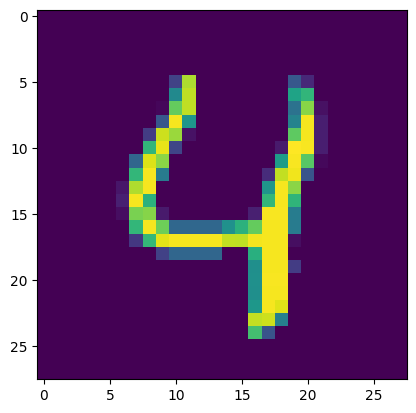

True Label = 4
Predicted Label = 4


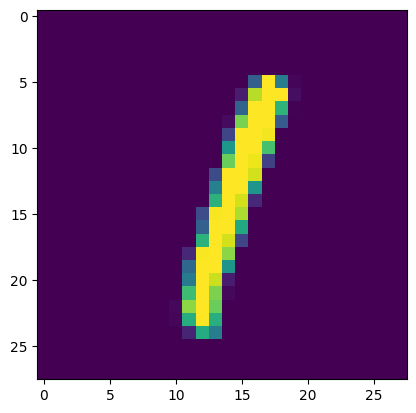

True Label = 1
Predicted Label = 1


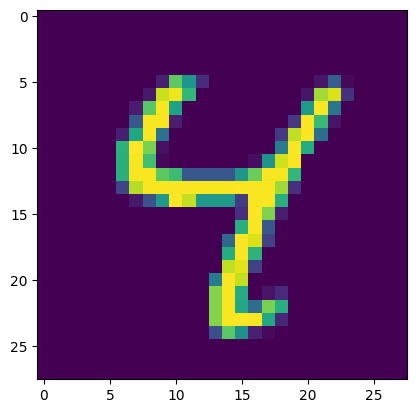

True Label = 4
Predicted Label = 4


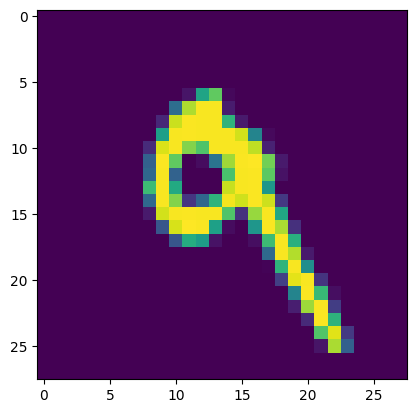

True Label = 9
Predicted Label = 9


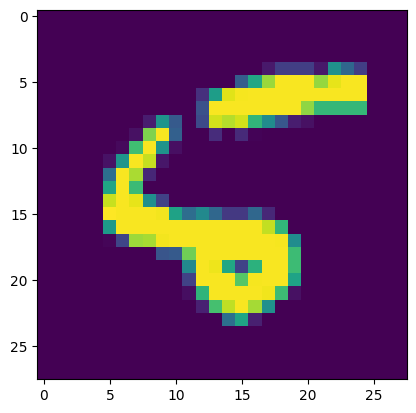

True Label = 5
Predicted Label = 6


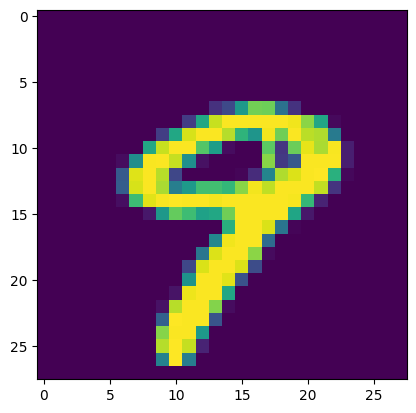

True Label = 9
Predicted Label = 9


In [46]:
images, labels = next(iter(test_loader))
for i in range(10):
    plt.imshow(images[i].numpy().transpose(1, 2, 0))
    plt.show()
    print(f'True Label = {labels[i]}')
    print(f'Predicted Label = {predict(model_3, images[i].unsqueeze(0)).item()}')